Logistic Regression Accuracy: 0.75


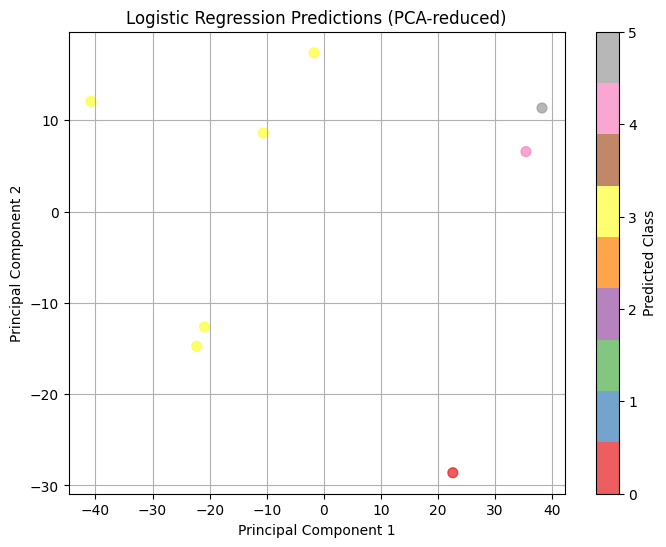

In [5]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv('weather_data.csv')


le = LabelEncoder()
for col in data.columns:
    data[col] = le.fit_transform(data[col])


X = data.drop('description(output)', axis=1)
y = data['description(output)']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


logreg_model = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence
logreg_model.fit(X_train, y_train)


y_pred = logreg_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
X_test_2D = pca.fit_transform(X_test)


plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_test_2D[:, 0], X_test_2D[:, 1], c=y_pred, cmap='Set1', s=50, alpha=0.7)
plt.title("Logistic Regression Predictions (PCA-reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(scatter, label="Predicted Class")
plt.grid(True)
plt.show()
